<center>

# EDA(clean datasets)

<center>

In [48]:
# Importations.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="text-align: justify">

### 1. Users items EDA.

I had to use samples do reduce the time to graphic. even after to reduce the file size the render/generetion of some graphic took more than 40 minutes.

</div>

In [30]:
# CSV files.
df_items = pd.read_csv('csv/users_items.csv')
df_reviews = pd.read_csv('csv/user_reviews.csv')
df_games = pd.read_csv('csv/steam_games.csv')

In [26]:
df_items.head(1)

,item_id,item_name,playtime_forever,user_id
0,300,Day of Defeat: Source,4733,76561197970982479


In [27]:
df_items.shape

(1374010, 4)

In [28]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374010 entries, 0 to 1374009
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   item_id           1374010 non-null  int64 
 1   item_name         1374010 non-null  object
 2   playtime_forever  1374010 non-null  int64 
 3   user_id           1374010 non-null  object
dtypes: int64(2), object(2)
memory usage: 41.9+ MB


In [29]:
# total number of users in the items file.
num_users = df_items['user_id'].nunique()
print(f'Number of users in the dataset: {num_users}')

Number of users in the dataset: 65713


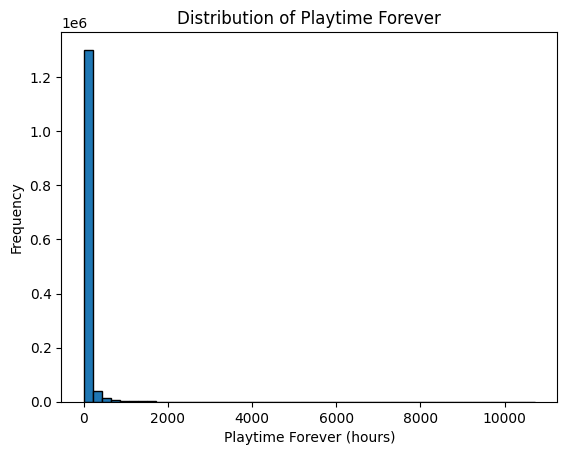

In [22]:
# Distribution of playtime in hours.
plt.hist(df_items['playtime_forever'] / 60, bins=50, edgecolor='black')
plt.xlabel('Playtime Forever (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Playtime Forever')
plt.show()

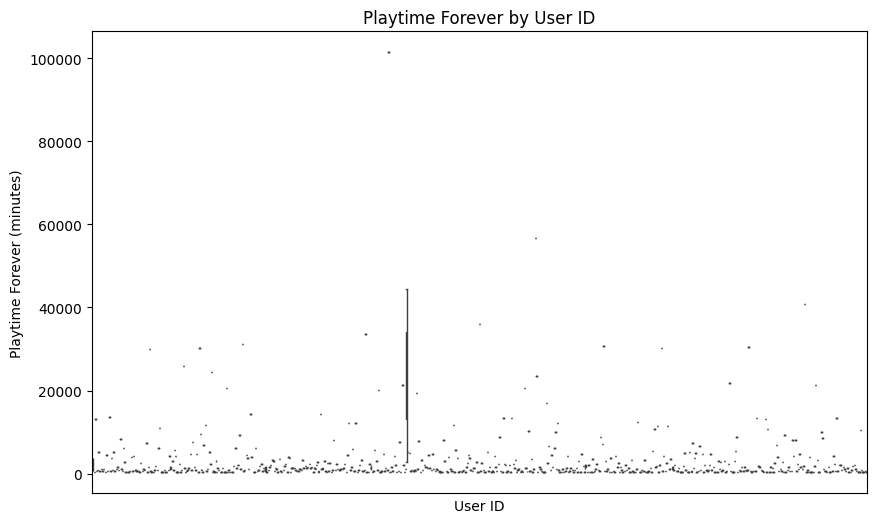

In [88]:
# Variability in the hours played for each user.
def plot_boxplot(df, num_samples='all'):
    plt.figure(figsize=(10, 6))

    if num_samples == 'all':
        sns.boxplot(x='user_id', y='playtime_forever', data=df)
    else:
        sample_data = df.sample(n=num_samples, random_state=42)
        sns.boxplot(x='user_id', y='playtime_forever', data=sample_data)

    plt.xlabel('User ID')
    plt.ylabel('Playtime Forever (minutes)')
    plt.title('Playtime Forever by User ID')
    plt.xticks([])#This line hides the names on the x-axis.
    plt.show()

plot_boxplot(df_items, num_samples=1000)

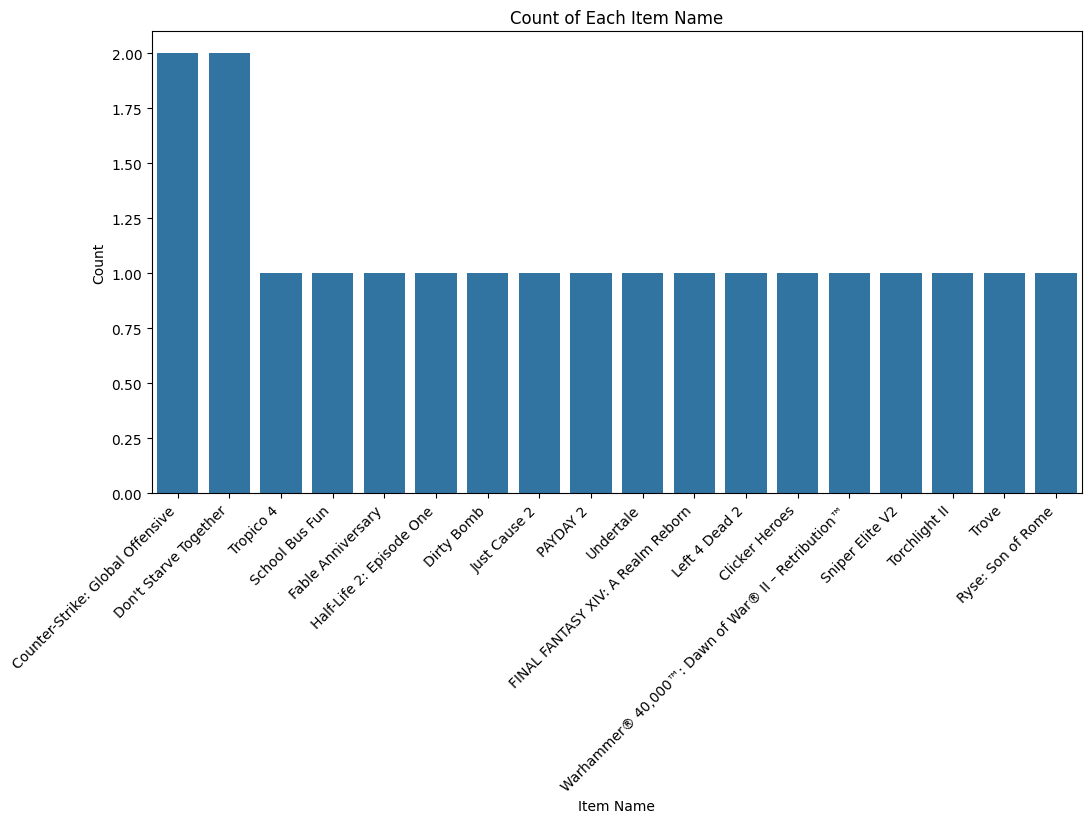

In [16]:
# Frequency of each item name.
def plot_countplot(df, num_samples='all'):
    if num_samples == 'all':
        data = df
    else:
        data = df.sample(n=num_samples, random_state=42)

    plt.figure(figsize=(12, 6))
    sns.countplot(x='item_name', data=data, order=data['item_name'].value_counts().index)
    plt.xlabel('Item Name')
    plt.ylabel('Count')
    plt.title('Count of Each Item Name')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_countplot(df_items, num_samples=20)

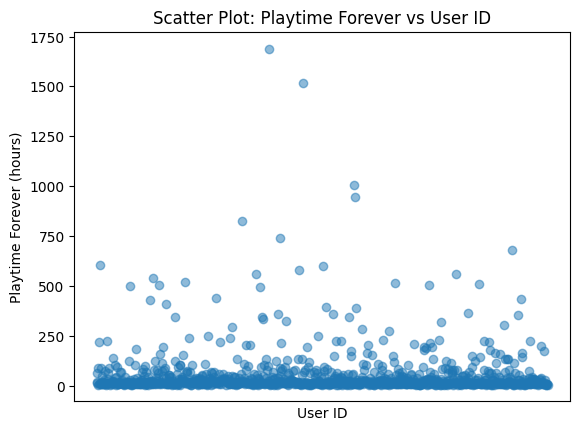

In [18]:
def plot_scatter(df, num_samples='all'):
    if num_samples == 'all':
        data = df
    else:
        data = df.sample(n=num_samples, random_state=42)

    plt.scatter(data['user_id'], data['playtime_forever'] / 60, alpha=0.5)
    plt.xlabel('User ID')
    plt.ylabel('Playtime Forever (hours)')
    plt.title('Scatter Plot: Playtime Forever vs User ID')

    # Hide user names on the x-axis.
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.show()

plot_scatter(df_items, num_samples=1000)

<div style="text-align: justify">

### 2. User Reviews EDA.

</div>

In [20]:
df_reviews.head(1)

,item_id,recommend,review,user_id
0,1250,True,Simple yet with great replayability. In my opi...,76561197970982479


In [21]:
df_reviews.shape

(58364, 4)

In [22]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58364 entries, 0 to 58363
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    58364 non-null  int64 
 1   recommend  58364 non-null  bool  
 2   review     58364 non-null  object
 3   user_id    58364 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 1.4+ MB


In [23]:
# Total number of users.
num_users = df_reviews['user_id'].nunique()
print(f'Number of users in the dataset: {num_users}')

Number of users in the dataset: 25425


In [40]:
# Calculate the percentage of 'True' and 'False'.
percentage = df_reviews['recommend'].value_counts(normalize=True) * 100
percentage

recommend
True     88.463779
False    11.536221
Name: proportion, dtype: float64

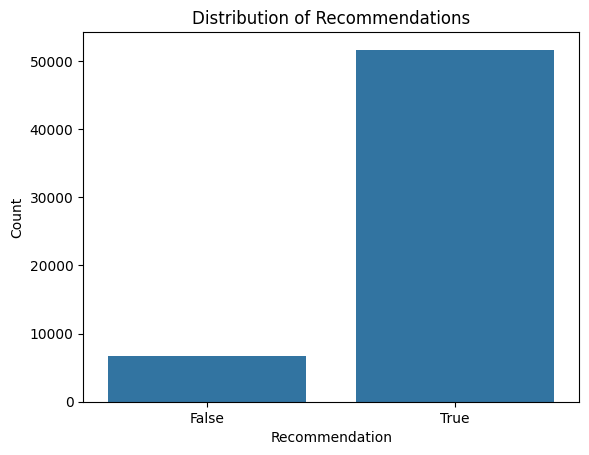

In [24]:
# Distribution of recommendations.
sns.countplot(x='recommend', data=df_reviews)
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.title('Distribution of Recommendations')
plt.show()

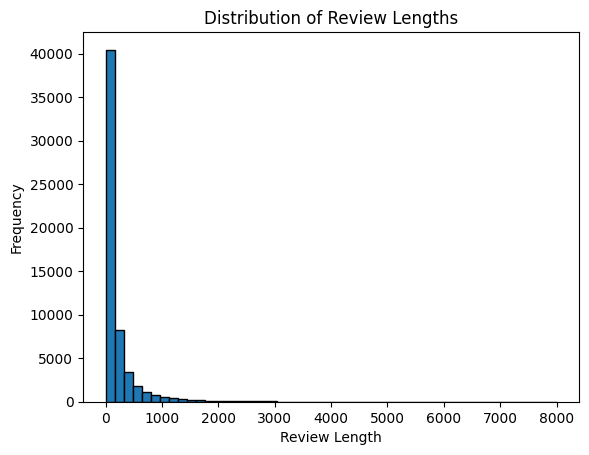

In [25]:
# Distribution of review lengths.
df_reviews['review_length'] = df_reviews['review'].apply(len)
plt.hist(df_reviews['review_length'], bins=50, edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

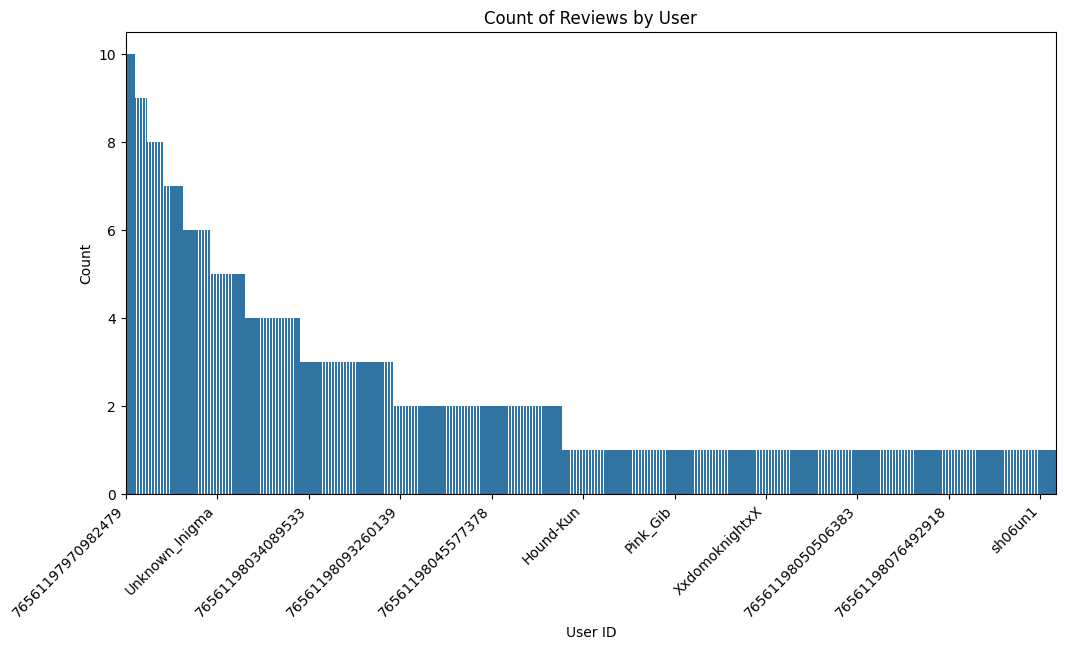

In [28]:
# Distribution of reviews per user.
plt.figure(figsize=(12, 6))
sns.countplot(x='user_id', data=df_reviews, order=df_reviews['user_id'].value_counts().index)
plt.xlabel('User ID')
plt.ylabel('Count')
plt.title('Count of Reviews by User')
plt.xticks(rotation=45, ha='right')

# Display only every 10 users on the x-axis.
plt.xticks(ticks=plt.xticks()[0][::2500], labels=df_reviews['user_id'].unique()[::2500])

plt.show()

<div style="text-align: justify">

### 3. Steam Games EDA.

</div>

In [31]:
df_games.head(1)

,genres,title,item_id,developer,year
0,Action,Lost Summoner Kitty,761140,Kotoshiro,2018


In [32]:
df_games.shape

(71009, 5)

In [33]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71009 entries, 0 to 71008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genres     71009 non-null  object
 1   title      71009 non-null  object
 2   item_id    71009 non-null  int64 
 3   developer  71009 non-null  object
 4   year       71009 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


In [42]:
# Total number of developers.
unique_developers_count = df_games['developer'].nunique()
print(f'Number of unique developers: {unique_developers_count}')

Number of unique developers: 10844


In [43]:
# Total number of titles.
unique_titles_count = df_games['title'].nunique()
print(f'Number of unique titles: {unique_titles_count}')

Number of unique titles: 28637


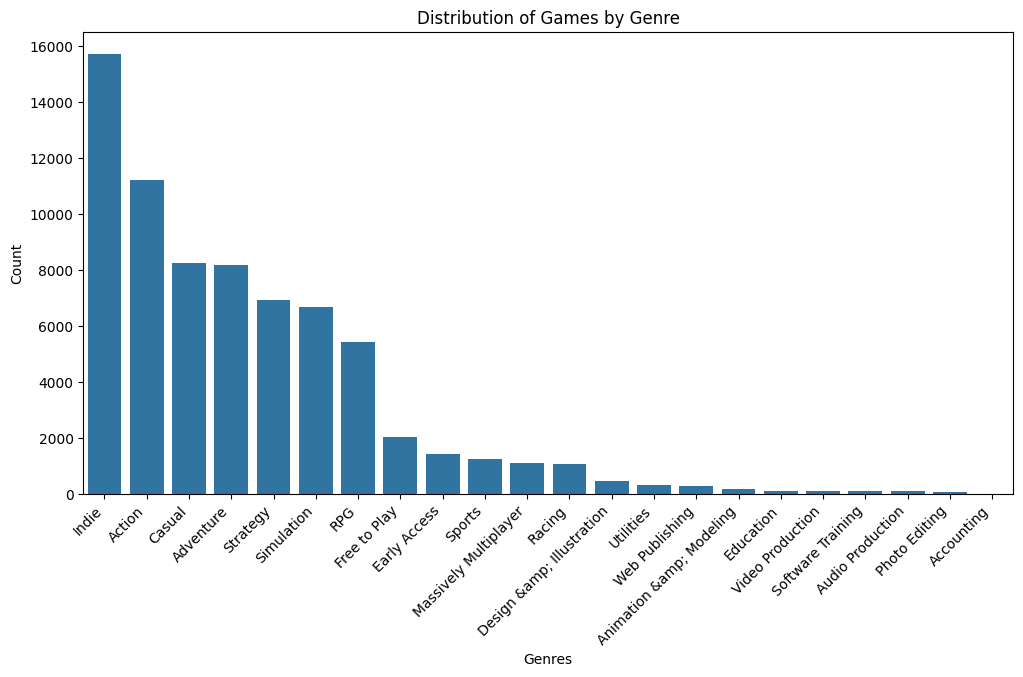

In [34]:
# Distribution of games by genre.
plt.figure(figsize=(12, 6))
sns.countplot(x='genres', data=df_games, order=df_games['genres'].value_counts().index)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Games by Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

In [66]:
# Calculate the number of games per category
games_by_genre = df_games['genres'].value_counts()

# Calculate the percentage of games per category
percentage_by_genre = (games_by_genre / games_by_genre.sum()) * 100

# Create a DataFrame with the information
result_df = pd.DataFrame({
    'Genres': games_by_genre.index,
    'Number of Games': games_by_genre.values,
    'Percentage': percentage_by_genre.values
})

# Print the formatted DataFrame with headers
print(f"{'Genres'.ljust(28)}{'Number of Games'.ljust(18)}Percentage")
for _, row in result_df.iterrows():
    print(f"{row['Genres'].ljust(28)}{row['Number of Games']}".ljust(45), f"{row['Percentage']:.2f}%")

Genres                      Number of Games   Percentage
Indie                       15705             22.12%
Action                      11223             15.81%
Casual                      8238              11.60%
Adventure                   8160              11.49%
Strategy                    6919              9.74%
Simulation                  6671              9.39%
RPG                         5435              7.65%
Free to Play                2022              2.85%
Early Access                1434              2.02%
Sports                      1250              1.76%
Massively Multiplayer       1101              1.55%
Racing                      1079              1.52%
Design &amp; Illustration   460               0.65%
Utilities                   338               0.48%
Web Publishing              268               0.38%
Animation &amp; Modeling    183               0.26%
Education                   125               0.18%
Video Production            116               0.16%
Sof

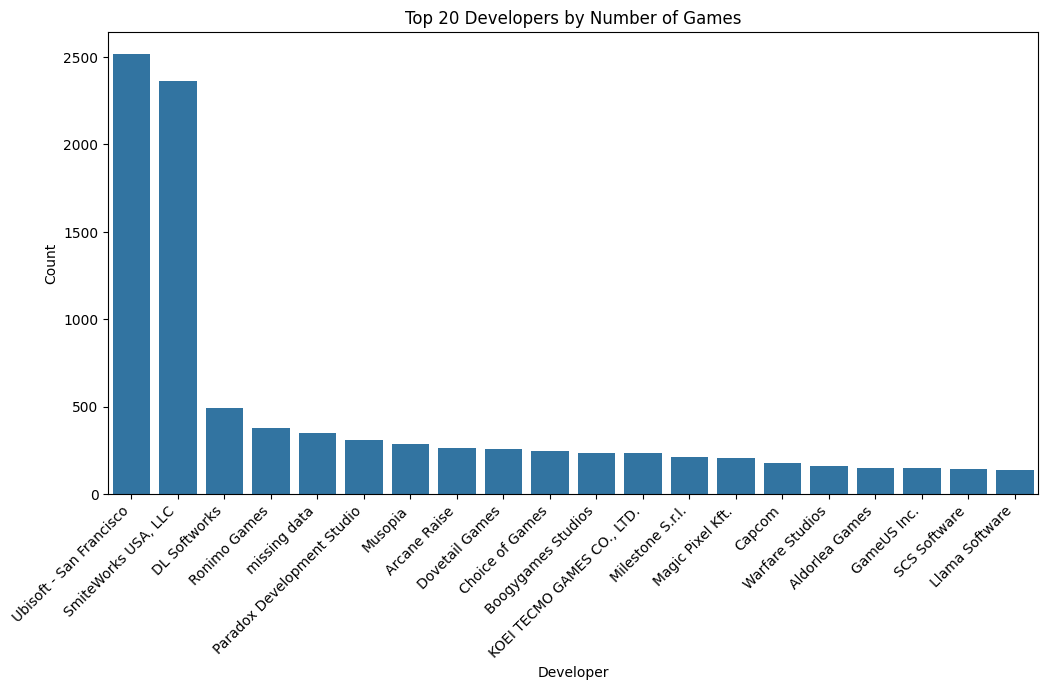

In [37]:
# The top 20 developers with the most games.
def plot_top_developers(df_games, top_n=10):
    top_developers = df_games['developer'].value_counts().nlargest(top_n).index
    filtered_data = df_games[df_games['developer'].isin(top_developers)]

    plt.figure(figsize=(12, 6))
    sns.countplot(x='developer', data=filtered_data, order=top_developers)
    plt.xlabel('Developer')
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Developers by Number of Games')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_top_developers(df_games, top_n=20)

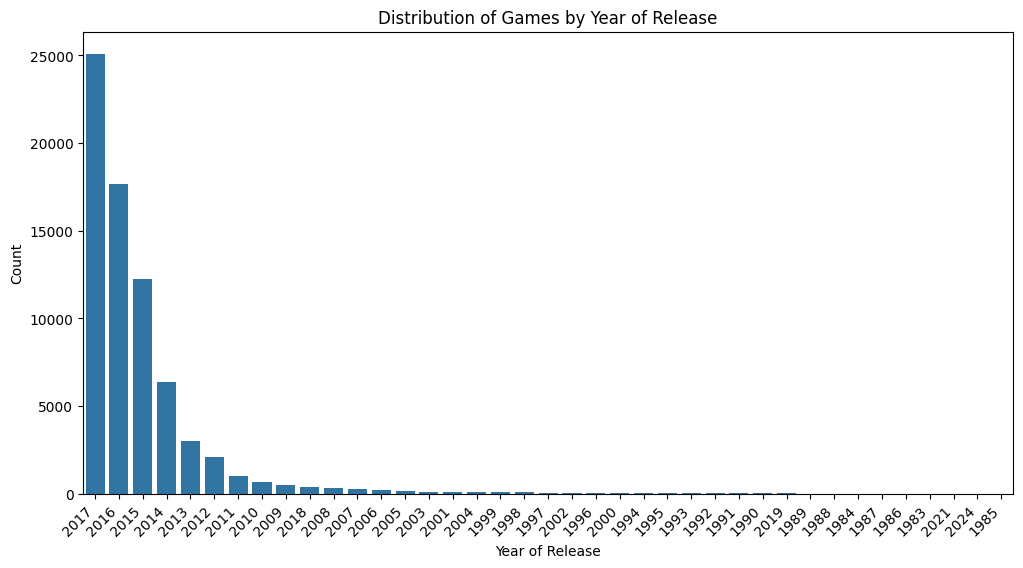

In [38]:
# Distribution of games by release year.
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df_games, order=df_games['year'].value_counts().index)
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.title('Distribution of Games by Year of Release')
plt.xticks(rotation=45, ha='right')
plt.show()

In [87]:
# Calculate the number of games per year
games_by_year = df_games['year'].value_counts().sort_index()

# Calculate the percentage of games per year
percentage_by_year = (games_by_year / games_by_year.sum()) * 100

# Create a DataFrame with the information
result_df = pd.DataFrame({
    'Year': games_by_year.index.astype(int),
    'Number of Games': games_by_year.values.astype(int),
    'Percentage': percentage_by_year.values
})

# Sort the DataFrame by Percentage in descending order
result_df = result_df.sort_values(by='Percentage', ascending=False)

# Print the formatted DataFrame with headers
print(f"{'Year'.ljust(7)}{'Number of Games'.ljust(17)}Percentage")
for _, row in result_df.iterrows():
    print(f"{str(int(row['Year'])).ljust(7)}{int(row['Number of Games'])}".ljust(23), f"{row['Percentage']:.2f}%")

Year   Number of Games  Percentage
2017   25100            35.35%
2016   17690            24.91%
2015   12272            17.28%
2014   6365             8.96%
2013   3017             4.25%
2012   2109             2.97%
2011   987              1.39%
2010   663              0.93%
2009   492              0.69%
2018   399              0.56%
2008   332              0.47%
2007   259              0.36%
2006   217              0.31%
2005   139              0.20%
2003   118              0.17%
2001   109              0.15%
2004   92               0.13%
1999   80               0.11%
1998   75               0.11%
1997   64               0.09%
2002   62               0.09%
1996   56               0.08%
2000   55               0.08%
1994   52               0.07%
1995   49               0.07%
1993   40               0.06%
1992   24               0.03%
1991   22               0.03%
1990   14               0.02%
2019   13               0.02%
1989   11               0.02%
1988   9                0.01%
19